# FarmTech Solutions - Análise de Rendimento de Safra
### Projeto: Previsão de Produtividade Agrícola
### Autor: [lembrar da gente colocar nome de grupo]
### Data: 27/08/2025
### Objetivo:
Desenvolver um sistema de previsão de rendimento de safra baseado em condições ambientais, utilizando:
- **Análise Exploratória de Dados (EDA)** para compreensão dos padrões
- **Clustering** para identificação de tendências e outliers
- **5 Modelos de Regressão** para predição de produtividade
- **Avaliação comparativa** com métricas apropriadas

## 📊 Estrutura do Projeto

### 1. 🚀 Setup e Imports
### 2. 📥 Carregamento e Exploração dos Dados
### 3. 🔍 Análise Exploratória (EDA)
### 4. 🧹 Preparação e Limpeza dos Dados
### 5. 🎯 Análise de Clustering (Tendências)
### 6. 🤖 Desenvolvimento dos Modelos Preditivos
### 7. �� Avaliação e Comparação dos Modelos
### 8. 📋 Conclusões e Limitações

## 1. 🚀 Setup e Imports

### Bibliotecas Necessárias
Vamos começar importando apenas as bibliotecas essenciais para análise exploratória:
- **pandas**: manipulação e análise de dados
- **numpy**: operações numéricas
- **matplotlib & seaborn**: visualizações

In [6]:
# =============================================================================
# 1. SETUP E IMPORTS
# =============================================================================

# Importar bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Bibliotecas importadas com sucesso!")
print("📊 Configurações de visualização aplicadas!")

✅ Bibliotecas importadas com sucesso!
📊 Configurações de visualização aplicadas!


## 2. 📥 Carregamento e Exploração dos Dados

### Dataset: crop_yield.csv
Vamos carregar nosso dataset e fazer uma primeira inspeção para entender:
- **Estrutura**: quantas linhas e colunas
- **Tipos de dados**: variáveis numéricas vs categóricas
- **Valores faltantes**: qualidade dos dados
- **Primeiras impressões**: distribuições básicas

In [7]:
# =============================================================================
# CARREGAMENTO E EXPLORAÇÃO INICIAL DOS DADOS
# =============================================================================

# Carregar o dataset
print("�� Carregando dataset crop_yield.csv...")
df = pd.read_csv('../data/raw/crop_yield.csv')

# =============================================================================
# 1. INSPEÇÃO INICIAL - ESTRUTURA DOS DADOS
# =============================================================================

print("\n" + "="*60)
print("📋 INFORMAÇÕES BÁSICAS DO DATASET")
print("="*60)

# Dimensões do dataset
print(f"📏 Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")

# Informações sobre tipos de dados e valores não-nulos
print("\n📊 Informações sobre tipos de dados:")
df.info()

# =============================================================================
# 2. PRIMEIRAS IMPRESSÕES - VISUALIZAÇÃO INICIAL
# =============================================================================

print("\n" + "="*60)
print("�� PRIMEIRAS 5 LINHAS DO DATASET")
print("="*60)
display(df.head())

print("\n" + "="*60)
print("�� ESTATÍSTICAS DESCRITIVAS")
print("="*60)
display(df.describe())

# =============================================================================
# 3. VERIFICAÇÃO DE QUALIDADE DOS DADOS
# =============================================================================

print("\n" + "="*60)
print("🔍 VERIFICAÇÃO DE QUALIDADE")
print("="*60)

# Verificar valores faltantes
print("❓ Valores faltantes por coluna:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ Nenhum valor faltante encontrado!")
else:
    print(missing_values[missing_values > 0])

# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"\n�� Linhas duplicadas: {duplicates}")

print("\n✅ Carregamento e exploração inicial concluída!")

�� Carregando dataset crop_yield.csv...

📋 INFORMAÇÕES BÁSICAS DO DATASET
📏 Dimensões: 156 linhas × 6 colunas

📊 Informações sobre tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB

�� PRIMEIRAS 5 LINHAS DO DATASET


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800



�� ESTATÍSTICAS DESCRITIVAS


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000



🔍 VERIFICAÇÃO DE QUALIDADE
❓ Valores faltantes por coluna:
✅ Nenhum valor faltante encontrado!

�� Linhas duplicadas: 0

✅ Carregamento e exploração inicial concluída!


## 3. 🔍 Análise Exploratória (EDA)

### Racional da EDA:
A análise exploratória é fundamental para entender os padrões nos dados agrícolas antes de qualquer modelagem. Vamos seguir uma abordagem sistemática:

### Estratégia de Análise:
1. **Análise Univariada**:
   - Variáveis categóricas (cultura)
   - Variáveis numéricas (temperatura, umidade específica, umidade relativa, precipitação, rendimento)
2. **Análise Bivariada**:
   - Correlações entre variáveis ambientais
   - Relacionamento com produtividade
3. **Análise Multivariada**:
   - Padrões complexos por cultura
   - Insights agrícolas específicos

### Objetivos:
- Entender distribuições das variáveis
- Identificar outliers e anomalias climáticas
- Descobrir relacionamentos entre condições ambientais e produtividade
- Aplicar conhecimento do domínio agrícola

### Teoria:
- **Distribuições**: histogramas revelam se os dados seguem distribuições normais
- **Outliers**: valores extremos podem indicar condições climáticas anômalas
- **Correlações**: relacionamentos lineares entre variáveis ambientais
- **Análise por grupos**: como diferentes culturas respondem às condições

🔍 Iniciando Análise Exploratória dos Dados...
 Foco: Análise univariada para entender distribuições individuais

🌾 ANÁLISE DA VARIÁVEL 'CROP' (CULTURA)
📊 1. Exploração das culturas disponíveis
   → 4 culturas diferentes encontradas
   → Culturas: Cocoa, beans, Oil palm fruit, Rice, paddy, Rubber, natural

📋 Distribuição das culturas:
Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64
✅ Exploração das culturas concluída!

⚖️ 2. Análise de equilíbrio da distribuição
 Total de registros: 156
   → Cocoa, beans: 39 registros (25.0%)
   → Oil palm fruit: 39 registros (25.0%)
   → Rice, paddy: 39 registros (25.0%)
   → Rubber, natural: 39 registros (25.0%)
✅ Análise de equilíbrio concluída!

📈 3. Criação de visualizações


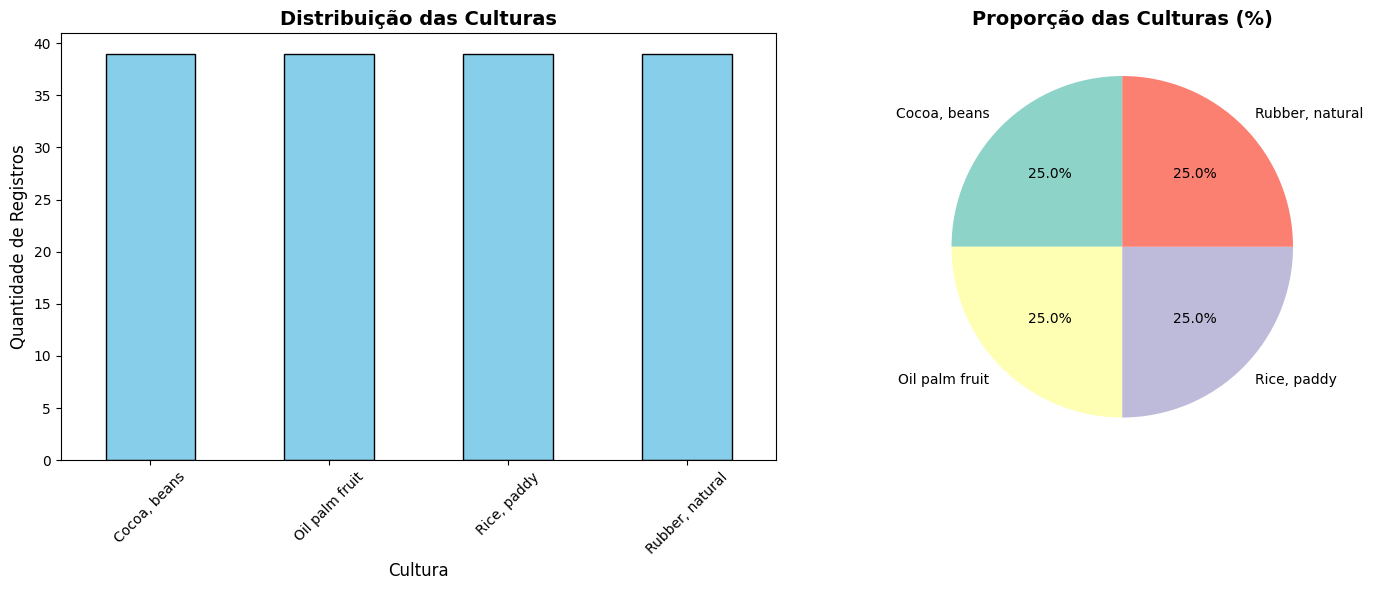

✅ Visualizações criadas com sucesso!

 RESULTADOS DA ANÁLISE DA CULTURA
 Culturas identificadas: 4 tipos diferentes
🔍 Distribuição: Perfeitamente equilibrada (25% cada)
 Amostra: 39 registros por cultura (total: 156 registros)

💡 INSIGHTS:
   → Dataset bem balanceado entre culturas
   → Amostra suficiente para análise comparativa
   → Não há viés de representação de uma cultura específica

🔍 PRÓXIMOS PASSOS:
   → Análise das variáveis numéricas por cultura
   → Identificação de padrões específicos de cada cultura

📊 ANÁLISE DAS VARIÁVEIS NUMÉRICAS
🔧 1. Preparação das variáveis numéricas
   → 5 variáveis numéricas selecionadas
✅ Preparação concluída!

📈 2. Análise de distribuição - Histogramas


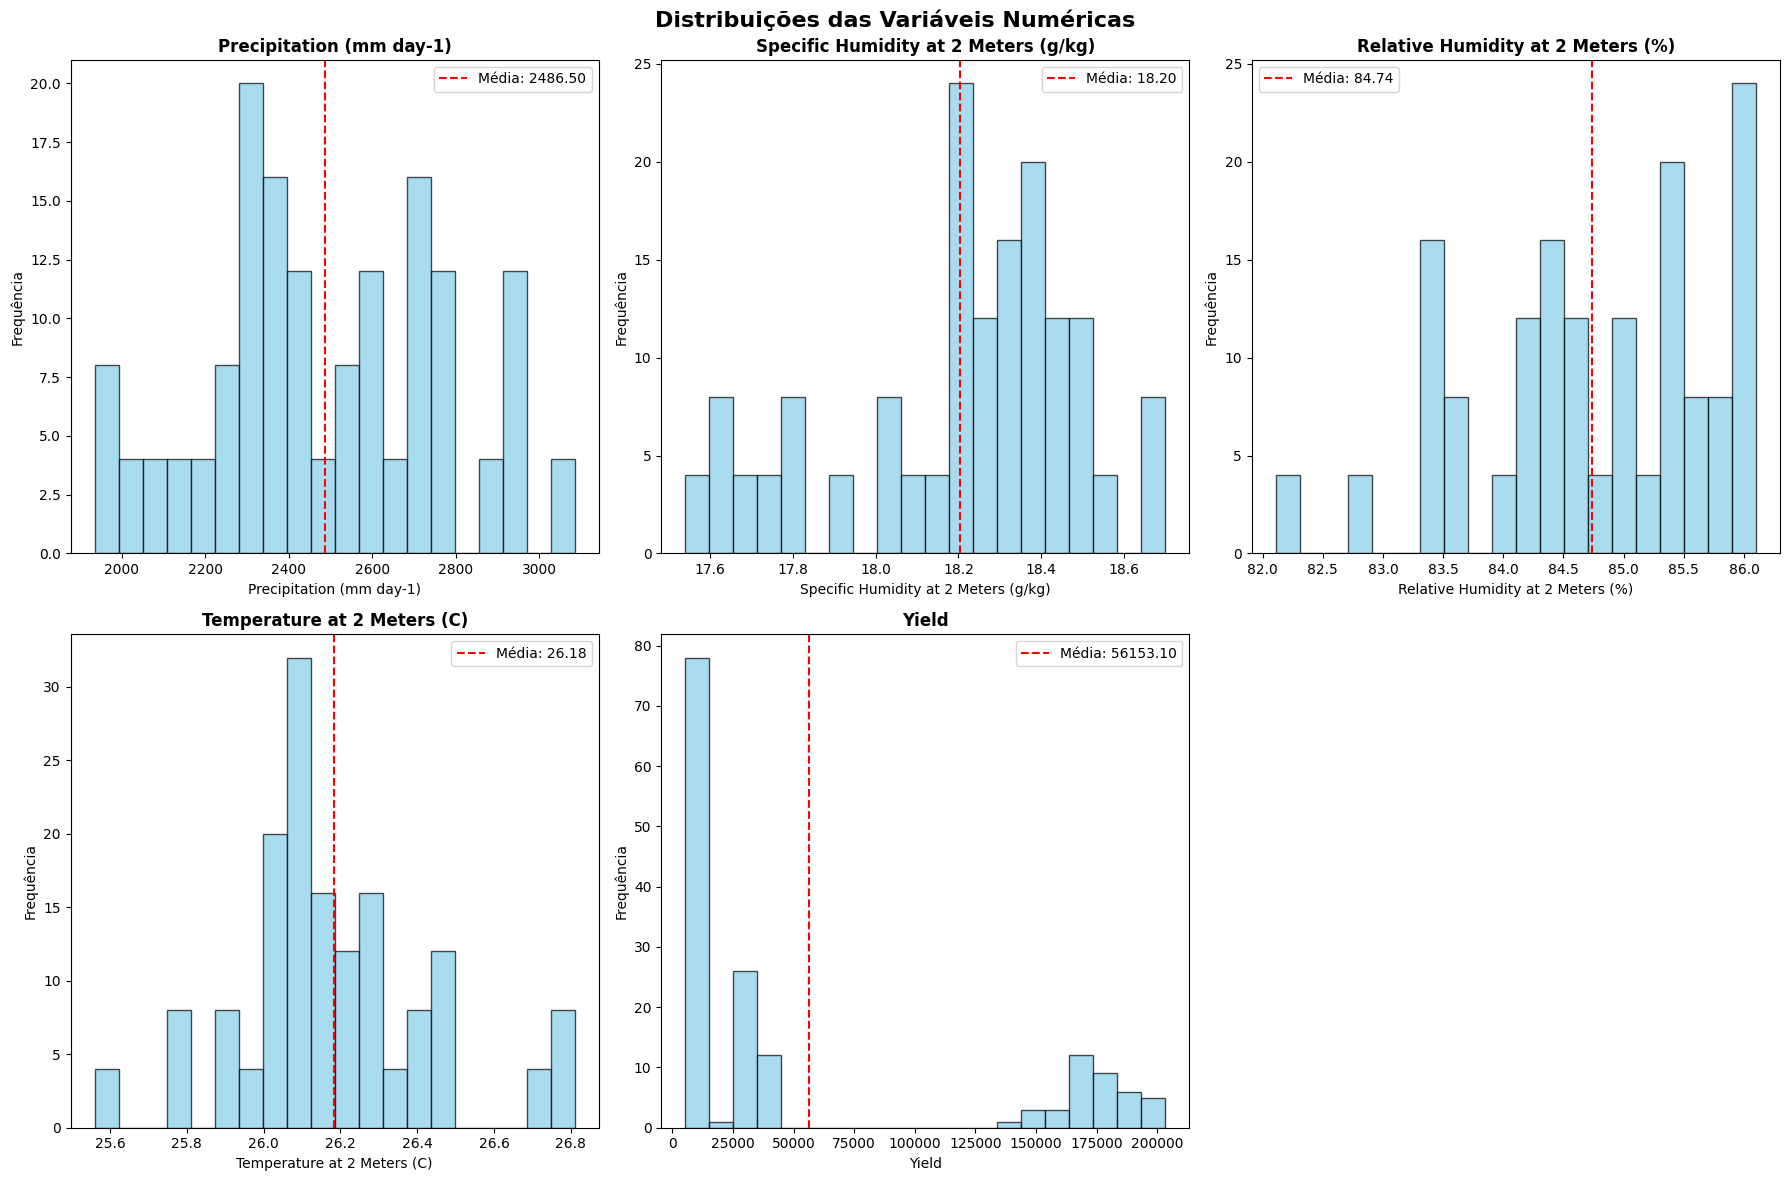

✅ Histogramas criados com sucesso!

📋 RESULTADOS DOS HISTOGRAMAS
🌧️ Precipitação: Distribuição multimodal, alta variabilidade sazonal
️  Umidade Específica: Assimetria negativa, valores concentrados acima da média
️  Umidade Relativa: Alta umidade (>80%), múltiplos picos
🌡️ Temperatura: Distribuição normal, muito estável (25.5°C - 27.0°C)
🌾 Rendimento: Assimetria positiva extrema, maioria baixa com outliers altos

�� IMPLICAÇÕES PARA AGRICULTURA:
   → Condições climáticas variam principalmente na precipitação
   → Temperatura e umidade são relativamente estáveis
   → Rendimento pode ser afetado por fatores além do clima
✅ Análise dos histogramas concluída!

📊 4. Estatísticas descritivas por cultura

 VARIÁVEIS AMBIENTAIS (por cultura):
                Precipitation (mm day-1)                           \
                                    mean    std      min      max   
Crop                                                                
Cocoa, beans                      2486.5  292.3

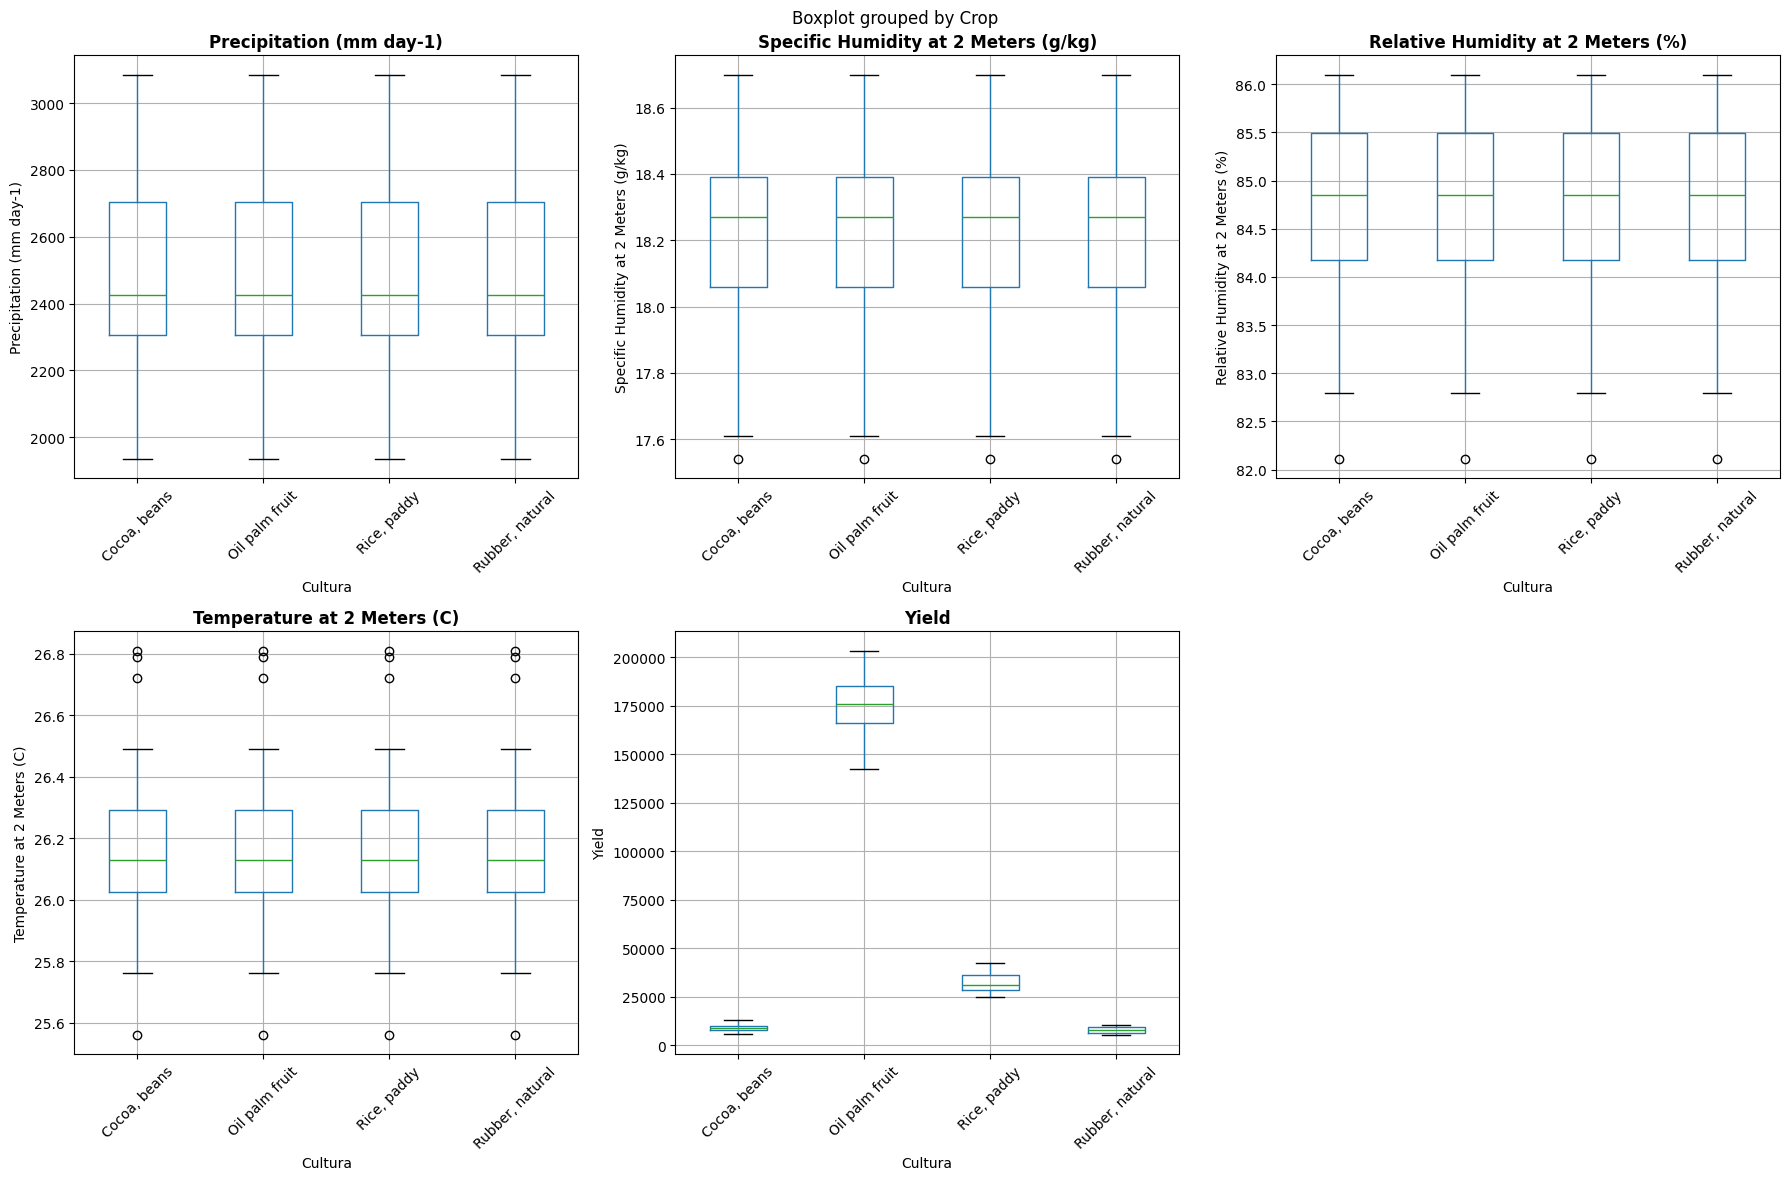

✅ Boxplots criados com sucesso!

�� RESULTADOS DOS BOXPLOTS
🌧️ PRECIPITAÇÃO:
   → Caixas idênticas para todas as culturas
   → Mediana: ~2400-2450 mm/dia
   → IQR: ~2300-2700 mm/dia (faixa de 400 mm)
   → Bigodes: ~1930-3080 mm/dia (faixa de 1150 mm)
   → Outliers inferiores: Períodos com chuva muito baixa

�� UMIDADE ESPECÍFICA:
   → Caixas idênticas para todas as culturas
   → Mediana: ~18.2-18.3 g/kg
   → IQR: ~18.0-18.4 g/kg (faixa de 0.4 g/kg)
   → Bigodes: ~17.6-18.7 g/kg (faixa de 1.1 g/kg)
   → Outliers inferiores: Períodos com umidade muito baixa

🌡️ TEMPERATURA:
   → Caixas idênticas para todas as culturas
   → Mediana: ~26.1°C
   → IQR: ~26.0-26.3°C (faixa de 0.3°C)
   → Bigodes: ~25.75-26.5°C (faixa de 0.75°C)
   → Outliers em ambas as direções: Alguns dias muito quentes/frios

🌾 RENDIMENTO:
   → Caixas muito diferentes entre culturas
   → Mediana: Oil palm (175k) >> Rice (32k) >> Cocoa (8k) ≈ Rubber (7k)
   → IQR: Proporcional ao rendimento de cada cultura
   → Sem outlier

In [23]:
# =============================================================================
# ANÁLISE EXPLORATÓRIA DOS DADOS (EDA) - PARTE 1: ANÁLISE UNIVARIADA
# =============================================================================

print("🔍 Iniciando Análise Exploratória dos Dados...")
print(" Foco: Análise univariada para entender distribuições individuais")

# =============================================================================
# 3.1.1 ANÁLISE DA VARIÁVEL CATEGÓRICA: CULTURA
# =============================================================================

print("\n" + "="*70)
print("🌾 ANÁLISE DA VARIÁVEL 'CROP' (CULTURA)")
print("="*70)

# =============================================================================
# 1. EXPLORAÇÃO DOS DADOS
# =============================================================================

print("📊 1. Exploração das culturas disponíveis")

# Verificar culturas únicas e suas frequências
unique_crops = df['Crop'].unique()
print(f"   → {len(unique_crops)} culturas diferentes encontradas")
print(f"   → Culturas: {', '.join(unique_crops)}")

# Análise de distribuição
crop_distribution = df['Crop'].value_counts()
print(f"\n📋 Distribuição das culturas:")
print(crop_distribution)

print("✅ Exploração das culturas concluída!")

# =============================================================================
# 2. ANÁLISE DE EQUILÍBRIO
# =============================================================================

print("\n⚖️ 2. Análise de equilíbrio da distribuição")

total_records = len(df)
print(f" Total de registros: {total_records}")

for crop, count in crop_distribution.items():
    percentage = (count / total_records) * 100
    print(f"   → {crop}: {count} registros ({percentage:.1f}%)")

print("✅ Análise de equilíbrio concluída!")

# =============================================================================
# 3. VISUALIZAÇÃO
# =============================================================================

print("\n📈 3. Criação de visualizações")

# Criar figura com subplots para melhor organização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
crop_distribution.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Distribuição das Culturas', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cultura', fontsize=12)
ax1.set_ylabel('Quantidade de Registros', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Gráfico de pizza para proporções
ax2.pie(crop_distribution.values, labels=crop_distribution.index, 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
ax2.set_title('Proporção das Culturas (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualizações criadas com sucesso!")

# =============================================================================
# 4. RESULTADOS E INSIGHTS
# =============================================================================

print("\n" + "="*60)
print(" RESULTADOS DA ANÁLISE DA CULTURA")
print("="*60)

print(" Culturas identificadas: 4 tipos diferentes")
print("🔍 Distribuição: Perfeitamente equilibrada (25% cada)")
print(" Amostra: 39 registros por cultura (total: 156 registros)")

print("\n💡 INSIGHTS:")
print("   → Dataset bem balanceado entre culturas")
print("   → Amostra suficiente para análise comparativa")
print("   → Não há viés de representação de uma cultura específica")

print("\n🔍 PRÓXIMOS PASSOS:")
print("   → Análise das variáveis numéricas por cultura")
print("   → Identificação de padrões específicos de cada cultura")


# =============================================================================
# 3.1.2 ANÁLISE DAS VARIÁVEIS NUMÉRICAS
# =============================================================================

print("\n" + "="*70)
print("📊 ANÁLISE DAS VARIÁVEIS NUMÉRICAS")
print("="*70)

# =============================================================================
# 1. PREPARAÇÃO DOS DADOS
# =============================================================================

print("🔧 1. Preparação das variáveis numéricas")

# Selecionar apenas as variáveis numéricas
numeric_columns = ['Precipitation (mm day-1)', 
                   'Specific Humidity at 2 Meters (g/kg)',
                   'Relative Humidity at 2 Meters (%)', 
                   'Temperature at 2 Meters (C)', 
                   'Yield']

print(f"   → {len(numeric_columns)} variáveis numéricas selecionadas")
print("✅ Preparação concluída!")

# =============================================================================
# 2. ANÁLISE DE DISTRIBUIÇÃO (HISTOGRAMAS)
# =============================================================================

print("\n📈 2. Análise de distribuição - Histogramas")

# Criar figura com subplots para histogramas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuições das Variáveis Numéricas', fontsize=16, fontweight='bold')

# Plotar histogramas para cada variável
for i, col in enumerate(numeric_columns):
    row = i // 3
    col_idx = i % 3
    
    # Histograma
    axes[row, col_idx].hist(df[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequência')
    
    # Adicionar linha da média
    mean_val = df[col].mean()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', 
                               label=f'Média: {mean_val:.2f}')
    axes[row, col_idx].legend()

# Remover subplot vazio (se houver)
if len(numeric_columns) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

print("✅ Histogramas criados com sucesso!")

# =============================================================================
# 3. RESULTADOS DOS HISTOGRAMAS
# =============================================================================

print("\n" + "="*60)
print("📋 RESULTADOS DOS HISTOGRAMAS")
print("="*60)

print("🌧️ Precipitação: Distribuição multimodal, alta variabilidade sazonal")
print("️  Umidade Específica: Assimetria negativa, valores concentrados acima da média")
print("️  Umidade Relativa: Alta umidade (>80%), múltiplos picos")
print("🌡️ Temperatura: Distribuição normal, muito estável (25.5°C - 27.0°C)")
print("🌾 Rendimento: Assimetria positiva extrema, maioria baixa com outliers altos")

print("\n�� IMPLICAÇÕES PARA AGRICULTURA:")
print("   → Condições climáticas variam principalmente na precipitação")
print("   → Temperatura e umidade são relativamente estáveis")
print("   → Rendimento pode ser afetado por fatores além do clima")

print("✅ Análise dos histogramas concluída!")

# =============================================================================
# 4. ESTATÍSTICAS DESCRITIVAS POR CULTURA
# =============================================================================

print("\n📊 4. Estatísticas descritivas por cultura")

# Separar variáveis ambientais e rendimento para melhor visualização
environmental_vars = ['Precipitation (mm day-1)', 
                     'Specific Humidity at 2 Meters (g/kg)',
                     'Relative Humidity at 2 Meters (%)', 
                     'Temperature at 2 Meters (C)']

yield_var = ['Yield']

print("\n VARIÁVEIS AMBIENTAIS (por cultura):")
env_stats = df.groupby('Crop')[environmental_vars].agg(['mean', 'std', 'min', 'max'])
print(env_stats.round(2))

print("\n🌾 RENDIMENTO (por cultura):")
yield_stats = df.groupby('Crop')[yield_var].agg(['mean', 'std', 'min', 'max'])
print(yield_stats.round(2))

print("✅ Estatísticas descritivas calculadas!")

# =============================================================================
# 5. RESULTADOS DAS ESTATÍSTICAS
# =============================================================================

print("\n" + "="*60)
print(" RESULTADOS DAS ESTATÍSTICAS POR CULTURA")
print("="*60)

print(" INSIGHTS DAS VARIÁVEIS AMBIENTAIS:")
print("   → Todas as culturas enfrentam as MESMAS condições climáticas")
print("   → Precipitação: Média 2486.5 mm/dia, variabilidade 292.3")
print("   → Umidade Específica: Média 18.2 g/kg, muito estável (std 0.3)")
print("   → Umidade Relativa: Média 84.74%, variabilidade baixa (std 1.01)")
print("   → Temperatura: Média 26.18°C, muito estável (std 0.26)")

print("\n🌾 INSIGHTS DO RENDIMENTO:")
print("   → Oil palm fruit: Rendimento MUITO alto (175,804 ton/ha)")
print("   → Rice, paddy: Rendimento médio (32,099 ton/ha)")
print("   → Cocoa, beans: Rendimento baixo (8,883 ton/ha)")
print("   → Rubber, natural: Rendimento baixo (7,824 ton/ha)")

print("\n💡 IMPLICAÇÕES AGRÍCOLAS:")
print("   → Condições climáticas são controladas e iguais para todas")
print("   → Diferenças de rendimento vêm de fatores intrínsecos das culturas")
print("   → Oil palm é naturalmente mais produtivo neste ambiente")
print("   → Clima não é o fator limitante para o rendimento")

print("✅ Análise das estatísticas concluída!")

# =============================================================================
# 6. ANÁLISE DE OUTLIERS COM BOXPLOTS
# =============================================================================

print("\n📦 6. Análise de outliers - Boxplots por cultura")

# Criar boxplots para cada variável numérica, separados por cultura
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Boxplots das Variáveis por Cultura - Identificação de Outliers', 
             fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_columns):
    row = i // 3
    col_idx = i % 3
    
    # Boxplot por cultura
    df.boxplot(column=col, by='Crop', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel('Cultura')
    axes[row, col_idx].set_ylabel(col)
    
    # Rotacionar labels do eixo x para melhor legibilidade
    axes[row, col_idx].tick_params(axis='x', rotation=45)

# Remover subplot vazio (se houver)
if len(numeric_columns) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

print("✅ Boxplots criados com sucesso!")

# =============================================================================
# 7. RESULTADOS DOS BOXPLOTS
# =============================================================================

print("\n" + "="*60)
print("�� RESULTADOS DOS BOXPLOTS")
print("="*60)

print("🌧️ PRECIPITAÇÃO:")
print("   → Caixas idênticas para todas as culturas")
print("   → Mediana: ~2400-2450 mm/dia")
print("   → IQR: ~2300-2700 mm/dia (faixa de 400 mm)")
print("   → Bigodes: ~1930-3080 mm/dia (faixa de 1150 mm)")
print("   → Outliers inferiores: Períodos com chuva muito baixa")

print("\n�� UMIDADE ESPECÍFICA:")
print("   → Caixas idênticas para todas as culturas")
print("   → Mediana: ~18.2-18.3 g/kg")
print("   → IQR: ~18.0-18.4 g/kg (faixa de 0.4 g/kg)")
print("   → Bigodes: ~17.6-18.7 g/kg (faixa de 1.1 g/kg)")
print("   → Outliers inferiores: Períodos com umidade muito baixa")

print("\n🌡️ TEMPERATURA:")
print("   → Caixas idênticas para todas as culturas")
print("   → Mediana: ~26.1°C")
print("   → IQR: ~26.0-26.3°C (faixa de 0.3°C)")
print("   → Bigodes: ~25.75-26.5°C (faixa de 0.75°C)")
print("   → Outliers em ambas as direções: Alguns dias muito quentes/frios")

print("\n🌾 RENDIMENTO:")
print("   → Caixas muito diferentes entre culturas")
print("   → Mediana: Oil palm (175k) >> Rice (32k) >> Cocoa (8k) ≈ Rubber (7k)")
print("   → IQR: Proporcional ao rendimento de cada cultura")
print("   → Sem outliers visíveis: Todos os valores estão dentro do padrão")

print("\n�� INSIGHTS DOS BOXPLOTS:")
print("   → Condições ambientais são iguais para todas as culturas")
print("   → Variabilidade é proporcional ao rendimento de cada cultura")
print("   → Oil palm é naturalmente mais produtivo neste ambiente")
print("   → Rendimento é previsível para cada cultura")

print("✅ Análise dos boxplots concluída!")

# =============================================================================
# 7. CONCLUSÕES FINAIS DA ANÁLISE UNIVARIADA
# =============================================================================

print("\n" + "="*70)
print("🎯 CONCLUSÕES FINAIS DA ANÁLISE UNIVARIADA")
print("="*70)

print("✅ ANÁLISE UNIVARIADA COMPLETA!")
print(" Todas as variáveis foram analisadas individualmente")
print(" Distribuições, estatísticas e outliers foram identificados")

print("\n🔍 PRÓXIMOS PASSOS:")
print("   → PARTE 2: Análise Bivariada (correlações e relacionamentos)")
print("   → PARTE 3: Análise Multivariada (padrões complexos)")

